### Descargar imágenes

In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Leer imágenes

In [5]:
ima = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/Noise0.001.png")
ima2 = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/Noise0.1.png")


In [6]:
def graficas(im1,im2):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.imshow(im1)
    plt.axis('off')
    plt.title('orignal')
    plt.subplot(1,2,2)
    plt.imshow(im2)
    plt.axis('off')
    plt.title('Filtrada')

### Gráficas originales

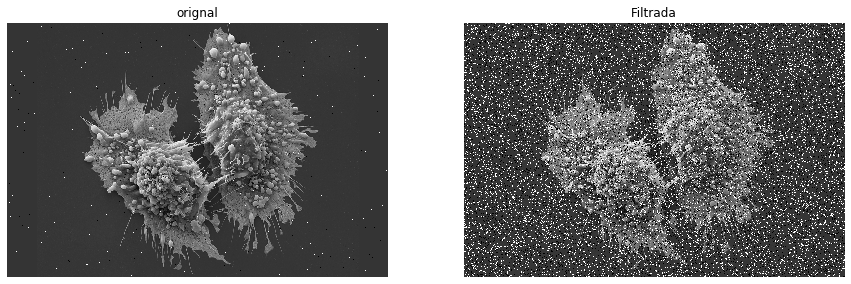

In [7]:
graficas(ima,ima2)

### Suavizado de imágenes
El suavizado , también llamado desenfoque , es una operación de procesamiento de imágenes simple y de uso frecuente. 

Las aplicaciones más usuales del suavizado está en la eliminación o reducción de ruido.

Para realizar una operación de suavizado y/o filtrado, aplicamos un filtro a nuestra imagen.

Los tipos más comunes de filtros son los lineales, es decir, en donde el valor de un píxel de salida (es decir $f(x,y)_{out}$) se determina como una suma ponderada de los valores de píxel de entrada (es decir $f(x+k,y+l)_{in}$):

$$f(x,y)_{out}=\sum_{k,l}f(i+k,j+l)_{in}h(k,l)$$

$h(k, l)$ se llama kernel, que no es más que una matriz más pequeña que la imagen original la cual contiene los valores del filtro.

Hay muchos tipos de filtros, aquí se mencionan los más utilizados:

#### blur
Este filtro es el más simple de todos! 

Cada píxel de salida es la media de sus vecinos del kernel (todos contribuyen con pesos iguales), por lo tanto, el kernel se expresa de la siguiente forma:


$$K=\dfrac{1}{K_{ancho} \cdot K_{height}}\begin{bmatrix} 1 & 1 & 1 & ... & 1 \\ 1 & 1 & 1 & ... & 1 \\ .  &.  &.  & ... & 1 \\.  &.  &.  & ... & 1 \\ 1 & 1 & 1 & ... & 1 \end{bmatrix}$$

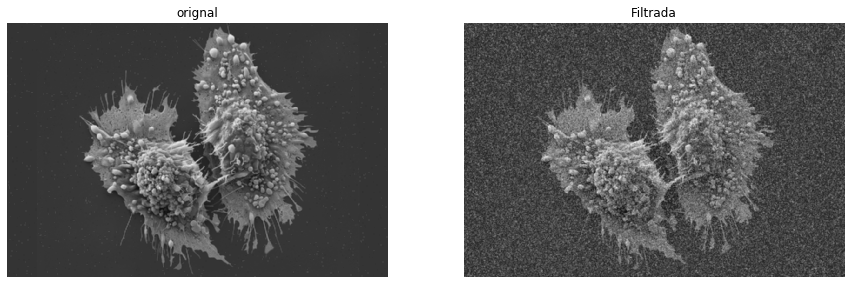

In [8]:
R1=cv2.blur(ima, (5,5), cv2.BORDER_DEFAULT)
R2=cv2.blur(ima2, (5,5), cv2.BORDER_DEFAULT)
graficas(R1,R2)

Aunque la mayor aplicación es la eliminación de ruido, estos tipo de filtros lineales crean desenfoque, como se muestra a continuación.

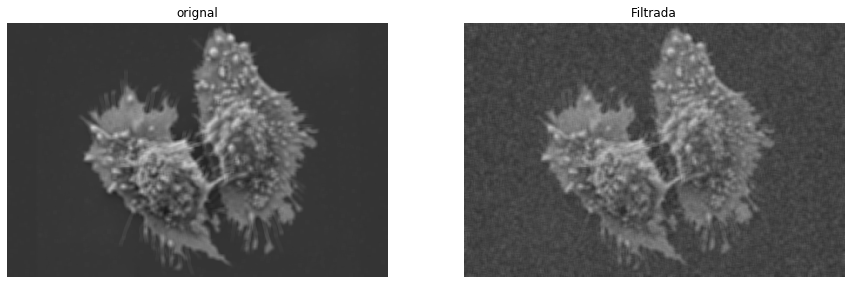

In [9]:
# BORDER_DEFAULT = BORDER_REFLECT = fedcba|abcdefgh|hgfedcb
R1=cv2.blur(ima, (13,13), cv2.BORDER_DEFAULT)
R2=cv2.blur(ima2, (13,13), cv2.BORDER_DEFAULT)
graficas(R1,R2)

### Filtro gaussiano
Probablemente el filtro más útil (aunque no el más rápido). 

El filtrado gaussiano se realiza convolucionando cada punto de la matriz de entrada con un núcleo gaussiano y luego sumándolos a todos para producir la matriz de salida.

Suponiendo que una imagen es 1D, puede notar que el píxel ubicado en el medio tendría el mayor peso. 

El peso de sus vecinos disminuye a medida que aumenta la distancia espacial entre ellos y el píxel central. 

Un ejemplo de un filtro gaussiano de $3x3$ se muestra a continuación:

$$K=\dfrac{1}{25}\begin{bmatrix} 1 & 3 & 1  \\ 3 & 9 & 3 \\ 1 & 3 & 1 \end{bmatrix}$$


Para el caso general de un kernel gaussino normal, la función que establece los pesos es la siguiente:
$$K(x, y)=Ae^{\dfrac{-(x-\mu_{x})^{2}}{2\sigma^{2}_{x}}+\dfrac{-(y-\mu_{y})^{2}}{2\sigma^{2}_{y}}}$$

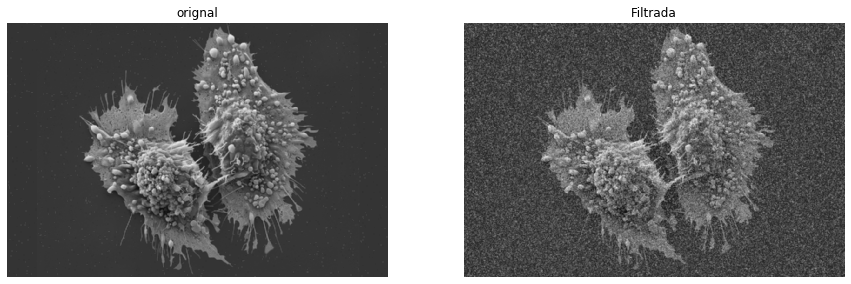

In [10]:
R1=cv2.GaussianBlur(ima,(5,5),cv2.BORDER_DEFAULT)
R2=cv2.GaussianBlur(ima2,(5,5),cv2.BORDER_DEFAULT)
graficas(R1,R2)

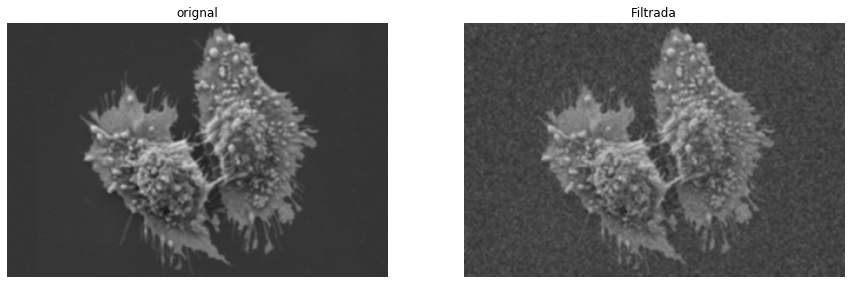

In [11]:
R1=cv2.GaussianBlur(ima,(13,13),cv2.BORDER_DEFAULT)
R2=cv2.GaussianBlur(ima2,(13,13),cv2.BORDER_DEFAULT)
graficas(R1,R2)

### Mediana
El filtro mediano recorre cada elemento de la señal (en este caso, la imagen) y reemplaza cada píxel con la mediana de sus píxeles vecinos (ubicados al interior del kernel de análisis).

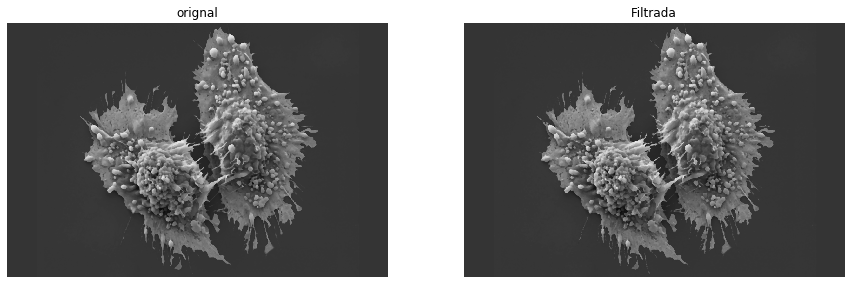

In [12]:
R1=cv2.medianBlur(ima, 5)
R2=cv2.medianBlur(ima2, 5)
graficas(R1,R2)